In [1]:
import pandas as pd

In [2]:
!ls data/DL76333/R/section3-dau.csv

data/DL76333/R/section3-dau.csv


In [3]:
dau = pd.read_csv('data/DL76333/R/section3-dau.csv')
dpu = pd.read_csv('data/DL76333/R/section3-dpu.csv')
install = pd.read_csv('data/DL76333/R/section3-install.csv')

In [5]:
dau.head()

,log_date,app_name,user_id
0,2013-06-01,game-01,116
1,2013-06-01,game-01,13491
2,2013-06-01,game-01,7006
3,2013-06-01,game-01,117
4,2013-06-01,game-01,13492


In [6]:
dau.columns

Index(['log_date', 'app_name', 'user_id'], dtype='object')

In [7]:
dpu.head()

,log_date,app_name,user_id,payment
0,2013-06-01,game-01,351,1333
1,2013-06-01,game-01,12796,81
2,2013-06-01,game-01,364,571
3,2013-06-01,game-01,13212,648
4,2013-06-01,game-01,13212,1142


In [8]:
dpu.columns

Index(['log_date', 'app_name', 'user_id', 'payment'], dtype='object')

In [9]:
install.head()

,install_date,app_name,user_id
0,2013-04-15,game-01,1
1,2013-04-15,game-01,2
2,2013-04-15,game-01,3
3,2013-04-15,game-01,4
4,2013-04-15,game-01,5


In [10]:
install.columns

Index(['install_date', 'app_name', 'user_id'], dtype='object')

# データ前処理

1. ユーザー情報のデータ（DAU）に利用開始情報（instal）を結合する
2. 上記のデータに、さらに課金情報（DPU）を結合する
3. 非課金ユーザーの課金額にゼロをいれる
4. 月次で集計する
5. 月次データに新規ユーザーか既存ユーザー化の区分を追加する

In [11]:
# 1
# dauとinstallを、user_id, app_nameをkeyにしてmerge
merge_dau_install = pd.merge(dau, install, on=['user_id', 'app_name'])

In [13]:
merge_dau_install.head()

,log_date,app_name,user_id,install_date
0,2013-06-01,game-01,116,2013-04-17
1,2013-06-02,game-01,116,2013-04-17
2,2013-06-03,game-01,116,2013-04-17
3,2013-06-04,game-01,116,2013-04-17
4,2013-06-05,game-01,116,2013-04-17


In [14]:
# 2
# dauとinstallをmergeしたDataframeと、dpuを、user_idとapp_nameとlog_dateをkeyにしてleft merge
merge_dau_install__dpu = pd.merge(merge_dau_install, dpu, how='left', on=['log_date', 'user_id', 'app_name'])

In [15]:
merge_dau_install__dpu.head()

,log_date,app_name,user_id,install_date,payment
0,2013-06-01,game-01,116,2013-04-17,NaN
1,2013-06-02,game-01,116,2013-04-17,NaN
2,2013-06-03,game-01,116,2013-04-17,NaN
3,2013-06-04,game-01,116,2013-04-17,NaN
4,2013-06-05,game-01,116,2013-04-17,NaN


In [23]:
# 3
merge_dau_install__dpu['payment'] = merge_dau_install__dpu['payment'].fillna(0)

In [24]:
merge_dau_install__dpu.head()

,log_date,app_name,user_id,install_date,payment
0,2013-06-01,game-01,116,2013-04-17,0.0
1,2013-06-02,game-01,116,2013-04-17,0.0
2,2013-06-03,game-01,116,2013-04-17,0.0
3,2013-06-04,game-01,116,2013-04-17,0.0
4,2013-06-05,game-01,116,2013-04-17,0.0


In [31]:
#4
merge_dau_install__dpu['log_date'] = pd.to_datetime(merge_dau_install__dpu['log_date'])

In [34]:
merge_dau_install__dpu['install_date'] = pd.to_datetime(merge_dau_install__dpu['install_date'])

In [35]:
merge_dau_install__dpu.head()

,log_date,app_name,user_id,install_date,payment
0,2013-06-01,game-01,116,2013-04-17,0.0
1,2013-06-02,game-01,116,2013-04-17,0.0
2,2013-06-03,game-01,116,2013-04-17,0.0
3,2013-06-04,game-01,116,2013-04-17,0.0
4,2013-06-05,game-01,116,2013-04-17,0.0


In [36]:
# 4
merge_dau_install__dpu['log_date'] = merge_dau_install__dpu['log_date'].dt.strftime('%Y%m')
merge_dau_install__dpu['install_date'] = merge_dau_install__dpu['install_date'].dt.strftime('%Y%m')

In [37]:
merge_dau_install__dpu.head()

,log_date,app_name,user_id,install_date,payment
0,201306,game-01,116,201304,0.0
1,201306,game-01,116,201304,0.0
2,201306,game-01,116,201304,0.0
3,201306,game-01,116,201304,0.0
4,201306,game-01,116,201304,0.0


In [102]:
# 月毎にユーザー別にグルーピング
# as_index=Falseを使うと、MultiIndexにならないのでそのあとも扱えるようになる
grouping = merge_dau_install__dpu.groupby(['log_date', 'user_id', 'install_date'], sort=['log_date', 'user_id'], as_index=False)[['payment']]

In [103]:
grouping

In [104]:
_payment_sum = grouping.sum()

In [105]:
type(_payment_sum)

pandas.core.frame.DataFrame

In [106]:
_payment_sum.head()

,log_date,user_id,install_date,payment
0,201306,1,201304,0.0
1,201306,2,201304,0.0
2,201306,3,201304,14994.0
3,201306,4,201304,0.0
4,201306,6,201304,0.0


In [109]:
_payment_sum.describe()

,user_id,payment
count,27036.000000,27036.000000
mean,16822.926062,16.082557
std,7543.798371,356.955989
min,1.000000,0.000000
25%,11646.750000,0.000000
50%,17543.000000,0.000000
75%,22603.000000,0.000000
max,29330.000000,20861.000000


In [101]:
_payment_sum.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            27026, 27027, 27028, 27029, 27030, 27031, 27032, 27033, 27034,
            27035],
           dtype='int64', length=27036)

In [116]:
import numpy as np

In [124]:
# 5
_payment_sum['new/exists'] = np.where(_payment_sum['log_date'] == _payment_sum['install_date'], 'new', 'exists')

In [125]:
_payment_sum.head()

,log_date,user_id,install_date,payment,new/exists
0,201306,1,201304,0.0,exists
1,201306,2,201304,0.0,exists
2,201306,3,201304,14994.0,exists
3,201306,4,201304,0.0,exists
4,201306,6,201304,0.0,exists


In [127]:
# やっとこさここまできた。。。アクセス月毎に新規と既存でグルーピング
_payment_sum.groupby(['log_date', 'new/exists'])[['payment']].sum()

payment
log_date new/exists          
201306   exists      177886.0
         new          49837.0
201307   exists      177886.0
         new          29199.0

In [135]:
%matplotlib inline

In [140]:
_payment_sum.groupby(['log_date', 'new/exists'])[['payment']].sum()

payment
log_date new/exists          
201306   exists      177886.0
         new          49837.0
201307   exists      177886.0
         new          29199.0

/Users/kazumatamaki/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


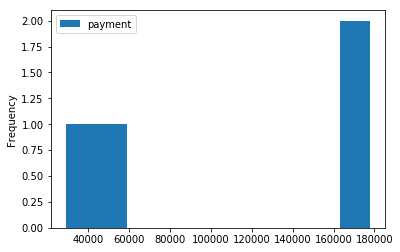

In [145]:
# plot
_payment_sum.groupby(['log_date', 'new/exists'], as_index=False).sum().plot(kind='hist', y='payment', x='new/exists')